## 데이터프레임 합치기
- 두개 이상의 DataFrame을 합쳐 하나의 DataFrame으로 생성

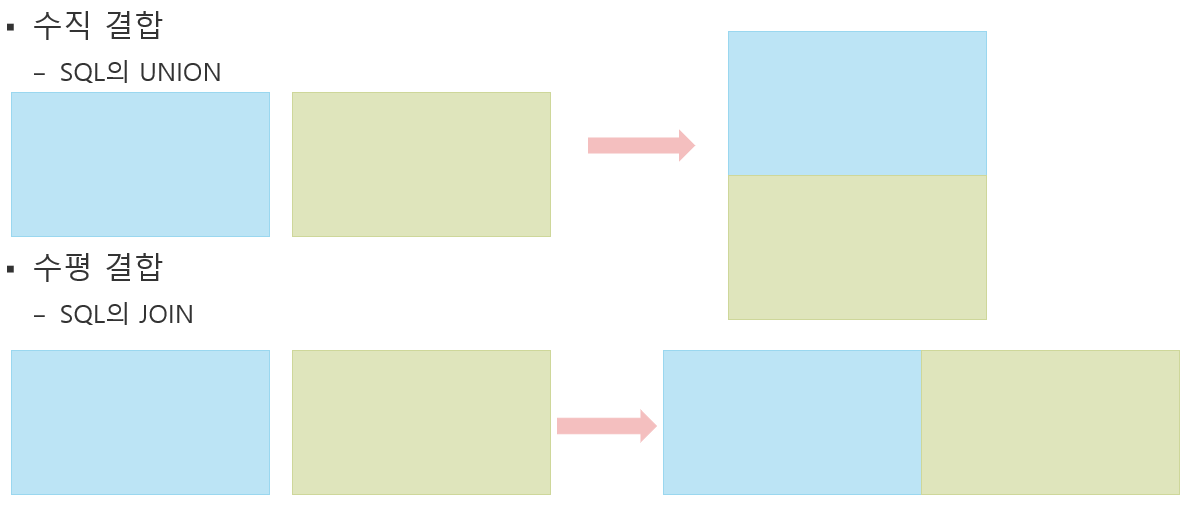

## 데이터셋 읽기
- stocks_2016.csv, stocks_2017.csv, stocks_2018.csv : 년도별 보유 주식
- stocks_info.csv : 주식 정보

In [1]:
import pandas as pd

In [2]:
# 같은 경로 같은 이름 형식의 파일 읽기
# a = pd.read_csv('data/stocks_2016.csv')
# b = pd.read_csv('data/stocks_2016.csv')
# c = pd.read_csv('data/stocks_2018.csv')
# i = pd.read_csv('data/stocks_info.csv')

f_txt = ['2016', '2017', '2018', 'info']
s_2016, s_2017, s_2018, s_info = [pd.read_csv(f'data/stocks_{txt}.csv') for txt in f_txt]

print(s_2016.shape, s_2017.shape, s_2018.shape, s_info.shape)

(3, 4) (6, 4) (3, 4) (8, 2)


## concat() 이용
- 수직, 조인을 이용한 수평 결합 모두 지원
- 수직 결합 경우의 병합 기준 : 컬럼명이 같은 열끼리 결합
- 조인(수평결합)의 경우 full outer join과 inner join을 지원
    - full outer join이 기본 방식
    - 조인 기준: index가 같은 행 끼리 병합 (equi-join)
- pd.concat(objs,  [, key=리스트]), axis=0, join='outer' )
    - 매개변수
        - objs: 합칠 DataFrame들을 리스트로 전달
        - keys=[] 를 이용해 합친 행들을 구분하기 위한 다중 인덱스 처리
        - axis
            - 0 또는 index : 수직결합
            - 1 또는 columns : 수평결합
        - join: 
            - 조인방식
            - 'outer'(기본값) 또는 'inner'

> ### 조인(join)
> - 여러 데이터프레임에 흩어져 있는 정보 중 필요한 정보만 모아서 결합하기 위한 것
> - 두개 이상의 데이터프레임을 특정 컬럼(열)의 값이 같은 행 끼리 수평 결합하는 것
> - Inner Join, Left Outer Join, Right Outer Join, Full Outer Join

In [3]:
# 데이터 결합
df = pd.concat([s_2016, s_2017, s_2018])
print(df.shape)
df

(12, 4)


,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300
0,AAPL,40,135,170


In [4]:
# indx 조회 시 각 df에 있는 index를 반환
df.loc[1]

,Symbol,Shares,Low,High
1,TSLA,50,80,130
1,GE,100,30,40
1,AMZN,8,900,1125


In [5]:
# 결합 시 index 제거
df2 = pd.concat([s_2016, s_2017, s_2018], ignore_index=True)
df2

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
3,AAPL,50,120,140
4,GE,100,30,40
5,IBM,87,75,95
6,SLB,20,55,85
7,TXN,500,15,23
8,TSLA,100,100,300
9,AAPL,40,135,170


In [6]:
# 결합 때 index를 재설정 했음으로 하나의 index만 조회 됨
df2.loc[1]

Symbol    TSLA
Shares      50
Low         80
High       130
Name: 1, dtype: object

In [7]:
# key를 이용한 multi-index
df3 = pd.concat([s_2016, s_2017, s_2018], keys=['2016', '2017', '2018'])
df3

Symbol  Shares  Low  High
2016 0   AAPL      80   95   110
     1   TSLA      50   80   130
     2    WMT      40   55    70
2017 0   AAPL      50  120   140
     1     GE     100   30    40
     2    IBM      87   75    95
     3    SLB      20   55    85
     4    TXN     500   15    23
     5   TSLA     100  100   300
2018 0   AAPL      40  135   170
     1   AMZN       8  900  1125
     2   TSLA      50  220   400

In [8]:
# 대분류된 index 조회 시 소속된 전체 index가 조회
df3.loc['2018']

,Symbol,Shares,Low,High
0,AAPL,40,135,170
1,AMZN,8,900,1125
2,TSLA,50,220,400


In [9]:
# 대분류 index 내 index 조회
df3.loc['2016', 1]

Symbol    TSLA
Shares      50
Low         80
High       130
Name: (2016, 1), dtype: object

In [10]:
# 수평 결합(axis=1) : index가 같은 행끼리 결합(full inner join이 기본)
df4 = pd.concat([s_2016, s_2018], axis=1)
print(df4.shape)
df4

(3, 8)


,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80,95,110,AAPL,40,135,170
1,TSLA,50,80,130,AMZN,8,900,1125
2,WMT,40,55,70,TSLA,50,220,400


In [11]:
# 행의 개수가 다른 df를 수평 결합 시 없는 정보는 결측치로 생성(∵ default는 full inner join)
df5 = pd.concat([s_2016, s_2017], axis=1)
print(df5.shape)
df5

(6, 8)


,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140
1,TSLA,50.0,80.0,130.0,GE,100,30,40
2,WMT,40.0,55.0,70.0,IBM,87,75,95
3,NaN,NaN,NaN,NaN,SLB,20,55,85
4,NaN,NaN,NaN,NaN,TXN,500,15,23
5,NaN,NaN,NaN,NaN,TSLA,100,100,300


In [12]:
# 행의 개수가 다른 df를 수평 결합 시 양쪽 행 모두 값이 있는 행들만 조회할 경우: inner join 
df6 = pd.concat([s_2016, s_2017], axis=1, join='inner')
print(df6.shape)
df6

(3, 8)


,Symbol,Shares,Low,High,Symbol,Shares,Low,High
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


## 조인을 통한 DataFrame 합치기
- join()
    - 2개 이상의 DataFrame을 결합 시 사용
- merge()
    - 2개의 DataFrame의 조인만 지원

### join()
- dataframe객체.join(others, how='left', lsuffix='', rsuffix='') 
- `df_A.join(df_b)`, `df_A.join([df_b, df_c, df_d])`
- 두개 이상의 DataFrame들을 조인 할 수 있다.
    - **조인 기준**: index가 같은 값인 행끼리 병합 (equi-join)
    - **조인 기본 방식**: Left Outer Join
- 매개변수
    - lsuffix, rsuffix
        - 조인 대상 DataFrame에 같은 이름의 컬럼이 있으면 에러 발생
        - 같은 이름이 있는 경우 붙일 접미어 지정
    - how :조인방식. 'left', 'right', 'outer', 'inner'. left가 기본
        

In [13]:
# target : s_info, source : s_2017
# s_info.join(s_2017) : join 대상 DataFrame에 같은 이름의 컬럼이 있는 경우 Error발생
s_info.join(s_2017, lsuffix='_info') # index명이 같은 행끼리 결합(s_info, s_2017 데이터셋에 맞춰진 잘못 된 join)

,Symbol_info,Name,Symbol,Shares,Low,High
0,AAPL,Apple Inc,AAPL,50.0,120.0,140.0
1,TSLA,Tesla Inc,GE,100.0,30.0,40.0
2,WMT,Walmart Inc,IBM,87.0,75.0,95.0
3,GE,General Electric,SLB,20.0,55.0,85.0
4,IBM,IBM(International Business Machines Co),TXN,500.0,15.0,23.0
5,SLB,Schlumberger Limited.,TSLA,100.0,100.0,300.0
6,TXN,Texas Instruments Incorporated,NaN,NaN,NaN,NaN
7,AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN


In [14]:
# target : s_2017, source : s_info
s_2017.join(s_info, lsuffix='_info')

,Symbol_info,Shares,Low,High,Symbol,Name
0,AAPL,50,120,140,AAPL,Apple Inc
1,GE,100,30,40,TSLA,Tesla Inc
2,IBM,87,75,95,WMT,Walmart Inc
3,SLB,20,55,85,GE,General Electric
4,TXN,500,15,23,IBM,IBM(International Business Machines Co)
5,TSLA,100,100,300,SLB,Schlumberger Limited.


In [15]:
# ∴ index 명을 기준으로 join 해야함
# s_info, s_2017 => 기준: 기준컬럼을 index로 변경 후 join
s_info.set_index('Symbol').join(s_2017.set_index('Symbol'))

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50.0,120.0,140.0
TSLA,Tesla Inc,100.0,100.0,300.0
WMT,Walmart Inc,NaN,NaN,NaN
GE,General Electric,100.0,30.0,40.0
IBM,IBM(International Business Machines Co),87.0,75.0,95.0
SLB,Schlumberger Limited.,20.0,55.0,85.0
TXN,Texas Instruments Incorporated,500.0,15.0,23.0
AMZN,"Amazon.com, Inc",NaN,NaN,NaN


In [16]:
# innner join(how='inner')
s_info.set_index('Symbol').join(s_2017.set_index('Symbol'), how='inner')

,Name,Shares,Low,High
Symbol,,,,
AAPL,Apple Inc,50,120,140
TSLA,Tesla Inc,100,100,300
GE,General Electric,100,30,40
IBM,IBM(International Business Machines Co),87,75,95
SLB,Schlumberger Limited.,20,55,85
TXN,Texas Instruments Incorporated,500,15,23


In [17]:
# target(s_info), source(s_2016, s_2017, s_2018)
s_info_2 = s_info.copy()
s_2016_2 = s_2016.copy()
s_2017_2 = s_2017.copy()
s_2018_2 = s_2018.copy()

# s_info_2.set_index('Symbol').join([s_2016_2.set_index('Symbol'), s_2017_2.set_index('Symbol'), s_2018_2.set_index('Symbol')])
#  => s_info_2에 join할 대상인 s_2016_2, s_2017_2, s_2018_2 세 DataFrame에 중복된 컬럼이 있기 때문에 Exception 발생(lsuffix, ruffix로 처리 안됨)


# df.add_suffix('문자열')/prefix('문자열') : df의 모든 컬럼명에 지정한 문자열을 접미사/접두사로 붙임
s_info_2.set_index('Symbol').join([
    s_2016_2.set_index('Symbol').add_prefix('2016_'),
    s_2017_2.set_index('Symbol').add_prefix('2017_'),
    s_2018_2.set_index('Symbol').add_prefix('2018_')
])

,Name,2016_Shares,2016_Low,2016_High,2017_Shares,2017_Low,2017_High,2018_Shares,2018_Low,2018_High
Symbol,,,,,,,,,,
AAPL,Apple Inc,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,Tesla Inc,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,Walmart Inc,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,General Electric,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,IBM(International Business Machines Co),NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,Schlumberger Limited.,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,Texas Instruments Incorporated,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,"Amazon.com, Inc",NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


### merge()
- `df_a.merge(df_b)`
- 두개의 DataFrame 조인만 지원
    - **조인 기준**: 같은 컬럼명을 기준으로 equi-join이 기본. **조인기준을 다양하게 설정 가능**
    - **조인 기본 방식**: inner join
- `dataframe.merge(합칠dataframe, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)`  
- 매개변수
    - on : 같은 컬럼명이 여러 개일 때 join 대상 컬럼을 선택
    - right_on, left_on : 조인할 때 사용할 왼쪽,오른쪽 Dataframe의 컬럼명
    - left_index, right_index: 조인 할때 index를 사용할 경우 True로 지정 
    - how : 조인 방식.  'left', 'right', 'outer', 'inner'. 기본: inner 
    - suffixes: 두 DataFrame에 같은 이름의 컬럼명이 있을 경우 구분을 위해 붙인 접미어를 리스트로 설정
        - 생략시 x, y를 붙임

In [18]:
# 컬럼 명이 같은 컬럼들을 기준으로 join
s_2016.merge(s_2017) # 컬럼값들이 같은 행이 없기 때문에 join 안됨(∵ default는 inner join)

,Symbol,Shares,Low,High


In [19]:
# 양쪽 컬럼값이 같은 행끼리 join
# join 대상 컬럼은 하나만 반환, 그외 컬럼은 모두 반환(단 컬럼명 중복의 경우 default로 [_x, _y] 식의 suffix가 붙음)
s_2016.merge(s_2017, on='Symbol', suffixes=['_2016', '_2017'])

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
0,AAPL,80,95,110,50,120,140
1,TSLA,50,80,130,100,100,300


In [20]:
# left join : s_2016의 모든 행이 반환
s_2016.merge(s_2017, on='Symbol', suffixes=['_2016', '_2017'], how='left')

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
0,AAPL,80,95,110,50.0,120.0,140.0
1,TSLA,50,80,130,100.0,100.0,300.0
2,WMT,40,55,70,NaN,NaN,NaN


In [21]:
# right join : s_2017의 모든 행이 반환
s_2016.merge(s_2017, on='Symbol', suffixes=['_2016', '_2017'], how='right')

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
0,AAPL,80.0,95.0,110.0,50,120,140
1,GE,NaN,NaN,NaN,100,30,40
2,IBM,NaN,NaN,NaN,87,75,95
3,SLB,NaN,NaN,NaN,20,55,85
4,TXN,NaN,NaN,NaN,500,15,23
5,TSLA,50.0,80.0,130.0,100,100,300


In [22]:
# full outer join : s_2016, s_2017의 모든 행이 반환
s_2016.merge(s_2017, on='Symbol', suffixes=['_2016', '_2017'], how='outer')

,Symbol,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
0,AAPL,80.0,95.0,110.0,50.0,120.0,140.0
1,TSLA,50.0,80.0,130.0,100.0,100.0,300.0
2,WMT,40.0,55.0,70.0,NaN,NaN,NaN
3,GE,NaN,NaN,NaN,100.0,30.0,40.0
4,IBM,NaN,NaN,NaN,87.0,75.0,95.0
5,SLB,NaN,NaN,NaN,20.0,55.0,85.0
6,TXN,NaN,NaN,NaN,500.0,15.0,23.0


In [23]:
s_info_2.set_index('Symbol', inplace=True)
s_info_2

,Name
Symbol,
AAPL,Apple Inc
TSLA,Tesla Inc
WMT,Walmart Inc
GE,General Electric
IBM,IBM(International Business Machines Co)
SLB,Schlumberger Limited.
TXN,Texas Instruments Incorporated
AMZN,"Amazon.com, Inc"


In [24]:
# s_2016 : Symbol 컬럼, s_info_2: index명 기준으로 join
s_2016.merge(s_info_2,
             left_on='Symbol', # 왼쪽 DataFrame의 join연산 기준 : column 
             right_index=True # 오른쪽 DataFrame의 join연산 기준 : index
            ) # 왼쪽의 컬럼과 오른쪽의 index명이 같은 행끼리 join, 방식 : inner

,Symbol,Shares,Low,High,Name
0,AAPL,80,95,110,Apple Inc
1,TSLA,50,80,130,Tesla Inc
2,WMT,40,55,70,Walmart Inc


- 수직으로 합치는 경우(Union) : concat() 사용
- 두개 **이상의** DataFrame을 조인할 때는 하는 경우 : join() 사용
- 두개의 DataFrame을 조인할 때는 **merge()** 를 사용한다. => 컨트롤이 편함

# TODO

In [25]:
# TODO 1 data/customer.csv, data/order.csv, data/qna.csv 를 DataFrame으로 읽으시오.
cus = pd.read_csv('data/customer.csv')
odf = pd.read_csv('data/order.csv')
qna = pd.read_csv('data/qna.csv')

In [26]:
# TODO 2 TODO1에서 읽은 세개의 데이터셋의 정보를 확인하세요. 
cus.shape, odf.shape, qna.shape

((5, 3), (6, 3), (3, 3))

In [27]:
# TODO 3 customer DataFrame과 order DataFrame을 결합하되, 고객정보는 모두 나오도록 join 하세요.
cus.set_index('id').join(odf.set_index('cust_id')) # 또는 cus.merge(odf, left_on='id', right_on='cust_id', how='left')

,name,age,order_id,total_price
id-1,김영수,33,1.0,100000.0
id-1,김영수,33,2.0,250000.0
id-2,박선영,23,3.0,300000.0
id-2,박선영,23,4.0,15000.0
id-2,박선영,23,5.0,51000.0
id-3,오정현,21,NaN,NaN
id-4,박명수,40,6.0,32000.0
id-5,이철기,17,NaN,NaN


In [28]:
# TODO 4 customer DataFrame의 index를 id컬럼으로 변경.
cus.set_index('id')

,name,age
id,,
id-1,김영수,33
id-2,박선영,23
id-3,오정현,21
id-4,박명수,40
id-5,이철기,17


In [29]:
# TODO 5 customer DataFrame과 qna DataFrame을 inner join 하세요.
cus.set_index('id').join(qna.set_index('cust_id'), how='inner') # 또는 cus.merge(qna, left_index='id', right_on='cust_id')

,name,age,qna_no,txt
id-4,박명수,40,1,물건있나요?
id-4,박명수,40,2,얼마에요
id-5,이철기,17,3,반품은 어떻게 해요?


In [30]:
# TODO 6. 세개의 DataFrame을 결합하되, 고객정보는 모두 나오도록 join 하세요.
cus.set_index('id').join([odf.set_index('cust_id'), qna.set_index('cust_id')])

,name,age,order_id,total_price,qna_no,txt
id-1,김영수,33,1.0,100000.0,NaN,NaN
id-1,김영수,33,2.0,250000.0,NaN,NaN
id-2,박선영,23,3.0,300000.0,NaN,NaN
id-2,박선영,23,4.0,15000.0,NaN,NaN
id-2,박선영,23,5.0,51000.0,NaN,NaN
id-3,오정현,21,NaN,NaN,NaN,NaN
id-4,박명수,40,6.0,32000.0,1.0,물건있나요?
id-4,박명수,40,6.0,32000.0,2.0,얼마에요
id-5,이철기,17,NaN,NaN,3.0,반품은 어떻게 해요?


## Database Table을 읽어 DataFrame 생성
-pd.read_sql('select문', connection)
    - 'select문' 조회결과를 가지는 DataFrame

In [31]:
import pymysql
import warnings
warnings.filterwarnings(action='ignore')

In [32]:
# mysql연동
connection = pymysql.connect(host='127.0.0.1', port=3306, user='scott', password='tiger', database='hr_join')

In [33]:
# DataFrame 생성
emp = pd.read_sql('select * from emp', connection)
emp

,emp_id,emp_name,job_id,mgr_id,hire_date,salary,comm_pct,dept_id
0,100,Steven,AD_PRES,NaN,2003-06-17,24000.0,NaN,90.0
1,101,Neena,AD_VP,100.0,2005-09-21,17000.0,NaN,90.0
2,102,Lex,AD_VP,100.0,2001-01-13,17000.0,NaN,90.0
3,103,Alexander,IT_PROG,102.0,2006-01-03,9000.0,NaN,60.0
4,104,Bruce,IT_PROG,103.0,2007-05-21,6000.0,NaN,60.0
...,...,...,...,...,...,...,...,...
102,202,Pat,MK_REP,201.0,2005-08-17,6000.0,NaN,20.0
103,203,Susan,HR_REP,101.0,2002-06-07,6500.0,NaN,40.0
104,204,Hermann,PR_REP,101.0,2002-06-07,10000.0,NaN,70.0
105,205,Shelley,AC_MGR,101.0,2002-06-07,12008.0,NaN,110.0


In [34]:
# 특정 조건을 만족하는 DataFrame 생성
emp_test = pd.read_sql('select emp_id ID, emp_name 이름, hire_date 입사일 from emp where comm_pct is not null', connection)
emp_test

,ID,이름,입사일
0,145,John,2004-10-01
1,146,Karen,2004-10-01
2,147,Alberto,2005-03-10
3,148,Gerald,2007-10-15
4,149,Eleni,2007-10-15
5,150,Peter,2007-10-15
6,151,David,2005-03-24
7,152,Peter,2005-08-20
8,153,Christopher,2006-03-30
9,154,Nanette,2006-12-09
